In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'pass_bar'
    filename = "NB.law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_student_academics():
    df = pd.read_csv('data/student_aca_clean.csv')    
    protected_attribute = 'ge'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "NB.student-academics.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Good-and-higher" else 0 for v in df['class']]
    #Label sex
    df['ge']=["Female" if v == "F" else "Male" for v in df['ge']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_xAPI_Edu():
    df = pd.read_csv('data/xAPI-Edu-Data.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "NB.xAPI-Edu-Data.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Medium-High" else 0 for v in df['Class']]
    #Label sex
    df['gender']=["Female" if v == "F" else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "NB.student-mat.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Pass" else 0 for v in df['Class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_student_por():
    df = pd.read_csv('data/student_por_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "NB.student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Pass" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_pisa():
    df = pd.read_csv('data/pisa_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readingScore'
    filename = "NB.pisa.abroca.pdf"    
    
    #Label class
    df['readingScore']=[1 if v == 'High' else 0 for v in df['readingScore']]
    #Label sex
    df['gender']=["Female" if v == 0 else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run GaussianNB model
    NB = GaussianNB()
    NB.fit(X_train,y_train)
    y_predicts = NB.predict(X_test)
    y_pred_probs = NB.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = NB.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [9]:
#Main function
def run_eval(dataset):
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'pisa':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_pisa()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'student-academics':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_academics()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'xAPI-Edu':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_xAPI_Edu()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.778423505528092, 'accuracy': 0.8190705128205128, 'fairness': 0.5249985328351494, 'Positive_prot_pred': 0.3268041237113402, 'Positive_non_prot_pred': 0.8518026565464896, 'Negative_prot_pred': 0.6731958762886598, 'Negative_non_prot_pred': 0.14819734345351043}
Equal opportunity
{'balanced_accuracy': 0.778423505528092, 'accuracy': 0.8190705128205128, 'fairness': 0.46647962009096866, 'TPR_protected': 0.42334739803094235, 'TPR_non_protected': 0.889827018121911, 'TNR_protected': 0.9382239382239382, 'TNR_non_protected': 0.5942028985507246}
Equalized odds
{'balanced_accuracy': 0.778423505528092, 'accuracy': 0.8190705128205128, 'fairness': 0.8105006597641823, 'TPR_protected': 0.42334739803094235, 'TPR_non_protected': 0.889827018121911, 'TNR_protected': 0.9382239382239382, 'TNR_non_protected': 0.5942028985507246}
Predictive parity
{'balanced_accuracy': 0.778423505528092, 'accuracy': 0.8190705128205128, 'fairness': 0.013048369902453505, 'TPR_protected': 

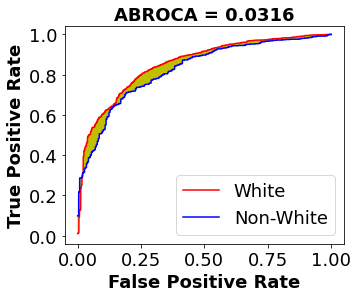

ABROCA: 0.03161238295136906


In [10]:
run_eval('law')

Statistical parity:
{'balanced_accuracy': 0.6379019292604502, 'accuracy': 0.662426614481409, 'fairness': -0.0316028212289432, 'Positive_prot_pred': 0.6583493282149712, 'Positive_non_prot_pred': 0.626746506986028, 'Negative_prot_pred': 0.3416506717850288, 'Negative_non_prot_pred': 0.37325349301397204}
Equal opportunity
{'balanced_accuracy': 0.6379019292604502, 'accuracy': 0.662426614481409, 'fairness': 0.026212525506200013, 'TPR_protected': 0.7391304347826086, 'TPR_non_protected': 0.7653429602888087, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5446428571428571}
Equalized odds
{'balanced_accuracy': 0.6379019292604502, 'accuracy': 0.662426614481409, 'fairness': 0.07085538264905711, 'TPR_protected': 0.7391304347826086, 'TPR_non_protected': 0.7653429602888087, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5446428571428571}
Predictive parity
{'balanced_accuracy': 0.6379019292604502, 'accuracy': 0.662426614481409, 'fairness': 0.06828099756736183, 'TPR_protected': 0.7391304347826086, 'TPR_non_

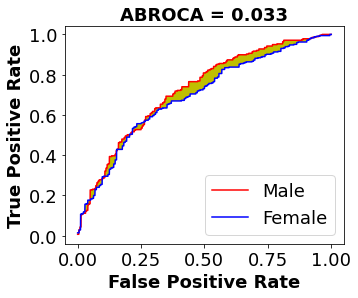

ABROCA: 0.03296794479721715


In [11]:
run_eval('pisa')

Statistical parity:
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': -0.1328320802005013, 'Positive_prot_pred': 0.8947368421052632, 'Positive_non_prot_pred': 0.7619047619047619, 'Negative_prot_pred': 0.10526315789473684, 'Negative_non_prot_pred': 0.23809523809523808}
Equal opportunity
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.09907120743034059, 'TPR_protected': 0.9411764705882353, 'TPR_non_protected': 0.8421052631578947, 'TNR_protected': 0.5, 'TNR_non_protected': 1.0}
Equalized odds
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.5990712074303406, 'TPR_protected': 0.9411764705882353, 'TPR_non_protected': 0.8421052631578947, 'TNR_protected': 0.5, 'TNR_non_protected': 1.0}
Predictive parity
{'balanced_accuracy': 0.8194444444444444, 'accuracy': 0.875, 'fairness': 0.05882352941176472, 'TPR_protected': 0.9411764705882353, 'TPR_non_protected': 0.8421052631578947, 'TNR_protected': 0.5, 'TNR_non_protected': 1.0

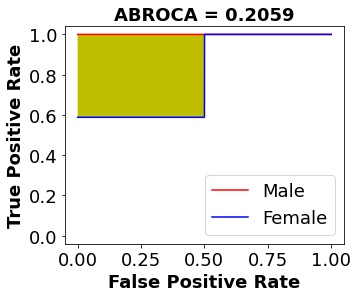

ABROCA: 0.2058823529411935


In [12]:
run_eval('student-academics')

Statistical parity:
{'balanced_accuracy': 0.8204288266825491, 'accuracy': 0.8487394957983193, 'fairness': 0.0825325042396835, 'Positive_prot_pred': 0.6551724137931034, 'Positive_non_prot_pred': 0.7377049180327869, 'Negative_prot_pred': 0.3448275862068966, 'Negative_non_prot_pred': 0.26229508196721313}
Equal opportunity
{'balanced_accuracy': 0.8204288266825491, 'accuracy': 0.8487394957983193, 'fairness': 0.016897081413210446, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9523809523809523, 'TNR_protected': 0.6666666666666666, 'TNR_non_protected': 0.7368421052631579}
Equalized odds
{'balanced_accuracy': 0.8204288266825491, 'accuracy': 0.8487394957983193, 'fairness': 0.08707252000970167, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9523809523809523, 'TNR_protected': 0.6666666666666666, 'TNR_non_protected': 0.7368421052631579}
Predictive parity
{'balanced_accuracy': 0.8204288266825491, 'accuracy': 0.8487394957983193, 'fairness': 0.1257309941520467, 'TPR_protecte

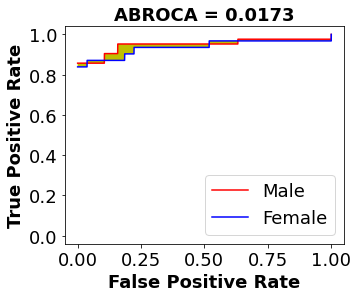

ABROCA: 0.017301479801480196


In [13]:
run_eval('student-mat')

Statistical parity:
{'balanced_accuracy': 0.8594674556213018, 'accuracy': 0.8974358974358975, 'fairness': -0.050926960017869116, 'Positive_prot_pred': 0.8347107438016529, 'Positive_non_prot_pred': 0.7837837837837838, 'Negative_prot_pred': 0.1652892561983471, 'Negative_non_prot_pred': 0.21621621621621623}
Equal opportunity
{'balanced_accuracy': 0.8594674556213018, 'accuracy': 0.8974358974358975, 'fairness': 0.017431192660550487, 'TPR_protected': 0.9174311926605505, 'TPR_non_protected': 0.9, 'TNR_protected': 0.9166666666666666, 'TNR_non_protected': 0.7142857142857143}
Equalized odds
{'balanced_accuracy': 0.8594674556213018, 'accuracy': 0.8974358974358975, 'fairness': 0.21981214504150282, 'TPR_protected': 0.9174311926605505, 'TPR_non_protected': 0.9, 'TNR_protected': 0.9166666666666666, 'TNR_non_protected': 0.7142857142857143}
Predictive parity
{'balanced_accuracy': 0.8594674556213018, 'accuracy': 0.8974358974358975, 'fairness': 0.05906452714236943, 'TPR_protected': 0.9174311926605505, 'T

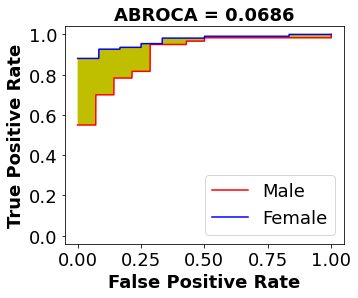

ABROCA: 0.06862539999562348


In [14]:
run_eval('student-por')

Statistical parity:
{'balanced_accuracy': 0.896969696969697, 'accuracy': 0.875, 'fairness': -0.2608028076332529, 'Positive_prot_pred': 0.7659574468085106, 'Positive_non_prot_pred': 0.5051546391752577, 'Negative_prot_pred': 0.23404255319148937, 'Negative_non_prot_pred': 0.4948453608247423}
Equal opportunity
{'balanced_accuracy': 0.896969696969697, 'accuracy': 0.875, 'fairness': 0.09743589743589742, 'TPR_protected': 0.8974358974358975, 'TPR_non_protected': 0.8, 'TNR_protected': 0.875, 'TNR_non_protected': 0.972972972972973}
Equalized odds
{'balanced_accuracy': 0.896969696969697, 'accuracy': 0.875, 'fairness': 0.19540887040887045, 'TPR_protected': 0.8974358974358975, 'TPR_non_protected': 0.8, 'TNR_protected': 0.875, 'TNR_non_protected': 0.972972972972973}
Predictive parity
{'balanced_accuracy': 0.896969696969697, 'accuracy': 0.875, 'fairness': 0.007369614512471645, 'TPR_protected': 0.8974358974358975, 'TPR_non_protected': 0.8, 'TNR_protected': 0.875, 'TNR_non_protected': 0.972972972972973

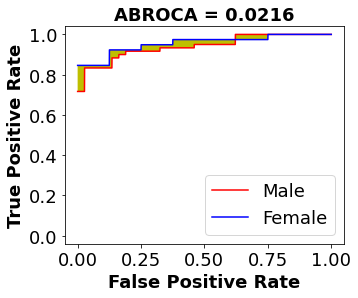

ABROCA: 0.02162596281471207


In [15]:
run_eval('xAPI-Edu')